In [1]:
import joblib

model = joblib.load('../model/vasco_model.sav')
model

SGDClassifier(loss='log_loss', n_jobs=-1, warm_start=True)

In [2]:
import pandas as pd
import numpy as np

# Load the trained model
model = joblib.load('../model/vasco_model.sav')

# Assuming X_df is the DataFrame with the features (tokens)
X_df = pd.read_feather('../model/preprocessed_data/x_new.feather')
tokens = X_df.columns

# Initialize an empty DataFrame to store the importances
importances_df = pd.DataFrame(index=tokens)

sgd_coefficients = model.coef_.flatten()
importances_df['sgd_importance'] = sgd_coefficients

# Sort by importance
importances_df = importances_df.sort_values(by='sgd_importance', ascending=False)

# Filter top positive and negative tokens for plotting
top_pos_tokens = importances_df.head(15)
top_neg_tokens = importances_df.tail(17)

# Combine top positive and negative for plotting
top_tokens = pd.concat([top_pos_tokens, top_neg_tokens])

# top_tokens.to_csv('top_tokens.csv')
        
print(top_tokens)
importances_df.loc['fal']

         sgd_importance
paiv           6.385484
torc           4.945106
part           4.770535
.              4.297318
vitor          4.228540
melhor         4.190272
e              4.055936
paul           3.883820
morr           3.777577
3              3.764359
frent          3.671102
pont           3.659397
noss           3.630256
deyv           3.543198
traze-l        3.447996
va            -2.858222
mau           -2.888714
botafog       -2.895806
emprest       -2.961884
pag           -2.975858
pum           -2.999351
club          -3.040133
dess          -3.154872
neym          -3.179184
sao           -3.275067
ja            -3.344768
esper         -3.440646
salari        -3.571016
fal           -3.690075
par           -4.077551
...           -5.604371
?             -6.744669


sgd_importance   -3.690075
Name: fal, dtype: float64

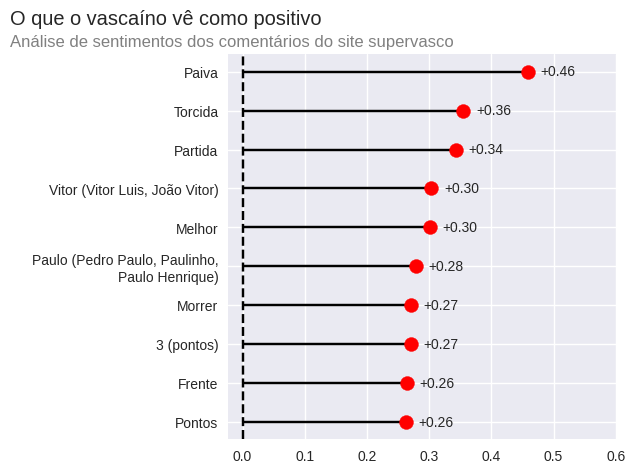

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np
from textwrap import wrap

# Load the top tokens importance data
top_tokens = pd.read_csv('top_tokens.csv', index_col=0)

pos_tokens = top_tokens.sort_values(['sgd_importance']).tail(10)

normalized_importance = normalize([np.array(pos_tokens['sgd_importance'])])[0]

labels = [ '\n'.join(wrap(l, 30)) for l in pos_tokens['stemmer_pt'] ]


# Plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(5, 5))
plt.scatter(normalized_importance, labels, s=100, zorder=2, c='red')
plt.hlines(y=labels, xmin=0, xmax=normalized_importance, zorder=1, colors='black')
for i, v in enumerate(normalized_importance):
    plt.text(v+0.02, i, f"{v:+.2f}", va='center', ha='left')


plt.xticks(np.arange(0, 0.65, 0.1))
plt.rcParams.update({'figure.titlesize': 'x-large'})

plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('')
plt.suptitle('O que o vascaíno vê como positivo', x=0, y=0.97)
plt.title('Análise de sentimentos dos comentários do site supervasco', x=0.01, y=1, c='gray')
plt.show()